In [1]:
import nest_asyncio
import asyncio
from twikit import Client
import pandas as pd
import time
import random

In [2]:
nest_asyncio.apply()

In [3]:
with open("cuentas_x.txt", "r", encoding="utf-8") as f:
    cuentas = [line.strip().split(",") for line in f]
#Número de cuentas
print(f"🔐 Número de cuentas: {len(cuentas)}")
USERNAME, EMAIL, PASSWORD = random.choice(cuentas)
print(f"🔐 Conectando con: {USERNAME}")

🔐 Número de cuentas: 5
🔐 Conectando con: ipdpdatos3


In [4]:
USERNAME='IpdpCpyp'
PASSWORD='Instituto2025'
EMAIL='ipdp.cpyp@gmail.com'

In [5]:
# Lista base de términos
temas_base = [
    "planeacion", "infraestructura", "agua", "pgd", "pgot", "metropolitano", 
    "consulta publica", "consulta indigena", "vivienda", "ordenamiento territorial", 
    "movilidad", "salud", "gestión de riesgos", "seguridad ciudadana", 
    "participacion ciudadana", "medio ambiente", "cultura", 
    "asentamientos irregulares", "ipdp", "congreso de la ciudad de mexico", 
    "transporte publico", "espacio publico", "patricia ramirez kuri"
]

busquedas = [f"{termino} cdmx" for termino in temas_base]

In [6]:
# Inicializar cliente
client = Client("es-ES")


async def login_and_search_multiple(queries, max_retries=3, retry_delay=30):
    await client.login(
        auth_info_1=USERNAME,
        auth_info_2=EMAIL,
        password=PASSWORD
    )

    all_data = []

    for query in queries:
        print(f"🔍 Buscando: {query}")
        retries = 0
        while retries <= max_retries:
            try:
                tweets = await client.search_tweet(query, "Latest")

                for tweet in tweets:
                    all_data.append({
                        "busqueda": query,
                        "usuario": tweet.user.name,
                        "usuario_id": tweet.user.id,
                        "texto": tweet.text,
                        "fecha": tweet.created_at,
                        "url": tweet.urls
                    })

                # Espera aleatoria entre búsquedas
                sleep_time = random.uniform(5, 12)
                print(f"⏳ Esperando {sleep_time:.1f} segundos...")
                await asyncio.sleep(sleep_time)
                break  # salir del ciclo si la búsqueda fue exitosa

            except Exception as e:
                print(f"⚠️ Error al buscar '{query}': {e}")
                if "Rate limit exceeded" in str(e).lower():
                    retries += 1
                    print(f"🔁 Reintentando en {retry_delay} segundos... (Intento {retries}/{max_retries})")
                    await asyncio.sleep(retry_delay)
                else:
                    break  # otro tipo de error, salir sin reintentar

    df = pd.DataFrame(all_data)
    return df



In [7]:
# Ejecutar
df_resultados = await login_and_search_multiple(busquedas, max_retries=5, retry_delay=60)
df_resultados['fecha'] = pd.to_datetime(df_resultados['fecha'], format="%a %b %d %H:%M:%S %z %Y", errors='coerce')

🔍 Buscando: planeacion cdmx
⏳ Esperando 7.2 segundos...
🔍 Buscando: infraestructura cdmx
⏳ Esperando 9.2 segundos...
🔍 Buscando: agua cdmx
⏳ Esperando 11.5 segundos...
🔍 Buscando: pgd cdmx
⏳ Esperando 5.1 segundos...
🔍 Buscando: pgot cdmx
⏳ Esperando 6.2 segundos...
🔍 Buscando: metropolitano cdmx
⏳ Esperando 8.1 segundos...
🔍 Buscando: consulta publica cdmx
⏳ Esperando 8.2 segundos...
🔍 Buscando: consulta indigena cdmx
⏳ Esperando 11.3 segundos...
🔍 Buscando: vivienda cdmx
⏳ Esperando 9.4 segundos...
🔍 Buscando: ordenamiento territorial cdmx
⏳ Esperando 11.1 segundos...
🔍 Buscando: movilidad cdmx
⏳ Esperando 8.4 segundos...
🔍 Buscando: salud cdmx
⏳ Esperando 5.4 segundos...
🔍 Buscando: gestión de riesgos cdmx
⏳ Esperando 7.7 segundos...
🔍 Buscando: seguridad ciudadana cdmx
⏳ Esperando 9.0 segundos...
🔍 Buscando: participacion ciudadana cdmx
⏳ Esperando 5.5 segundos...
🔍 Buscando: medio ambiente cdmx
⏳ Esperando 7.9 segundos...
🔍 Buscando: cultura cdmx
⏳ Esperando 8.8 segundos...
🔍 Busc

In [8]:
df_resultados

,busqueda,usuario,usuario_id,texto,fecha,url
0,planeacion cdmx,Felipe Ponce,334778262,Perdón pero no. \nSe los escribo desde Pueblo ...,2025-06-19 00:54:45+00:00,[]
1,planeacion cdmx,Olivia Garza,169737772,Presenté una iniciativa para impulsar el equil...,2025-06-18 20:47:06+00:00,[]
2,planeacion cdmx,SECTEI CDMX,209755119,El secretario @PabloYanesRizo presidió la Prim...,2025-06-18 20:09:13+00:00,[]
3,planeacion cdmx,ANUIES,76686789,En el Centro de Innovación y Desarrollo de la ...,2025-06-18 16:48:48+00:00,[]
4,planeacion cdmx,Olivia Garza,169737772,Urgen a definir ruta para Planeación en la CDM...,2025-06-18 14:47:56+00:00,"[{'display_url': 'reforma.com/qKrS3r', 'expand..."
...,...,...,...,...,...,...
419,patricia ramirez kuri cdmx,Diputadas y Diputados PAN CDMX,114601989,El Instituto de Planeación Democrática y Prosp...,2025-04-02 17:28:53+00:00,[]
420,patricia ramirez kuri cdmx,Pedro Haces Lago Oficial,1539348026728275968,"¡Felicidades, Patricia Ramirez Kuri! \n\nCeleb...",2025-04-02 16:30:33+00:00,[]
421,patricia ramirez kuri cdmx,@diario24horas,357050985,🔵 @PAN_CDMX hizo un llamado a Patricia Ramírez...,2025-04-02 16:30:09+00:00,[{'display_url': '24-horas.mx/cdmx/pide-pan-…'...
422,patricia ramirez kuri cdmx,El Sol de México,111110077,✍️ #Opinión de @ReyPeatonMX\n\nQuien haya segu...,2025-04-02 14:02:57+00:00,"[{'display_url': 'solde.mx/4clmd5C', 'expanded..."


<Axes: title={'center': 'Número de Tweets por Fecha'}, xlabel='fecha'>

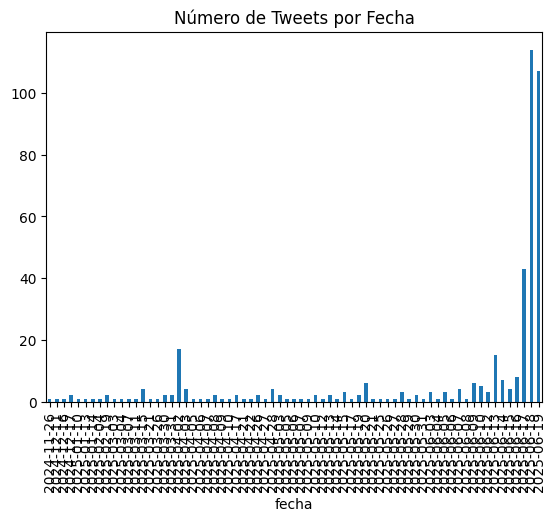

In [9]:
#Hacer gráfica de número de tweets por fecha
df_resultados.groupby(df_resultados['fecha'].dt.date).size().plot(kind='bar', title='Número de Tweets por Fecha')

In [10]:
#Filtrar de los últimos 2 días
tuits_filtrados = df_resultados[
    df_resultados['fecha'] >= pd.Timestamp.now(tz='UTC') - pd.Timedelta(days=2)
]
tuits_filtrados
print(f"🔍 Resultados filtrados: {len(tuits_filtrados)} tuits encontrados.")

🔍 Resultados filtrados: 255 tuits encontrados.


In [11]:
#Guardar resultados en CSV
tuits_filtrados.to_csv("resultados_busqueda_tweets.csv", index=False, encoding='utf-8-sig')